In [1]:
# Notebook settings
%matplotlib inline

<img src="https://github.com/bdecon/bdecon.github.io/raw/master/images/01_bdlogo.png" alt="BD Economics" style="width: 100px;"/>
# IMF API Example 
Brian Dew, Principal, BD Economics, @bd_econ 

### Short example

The IMF's API allows machine access to macroeconomic data covering more than 180 countries. Using python, it is easy to retrieve data from this API.

A simple example below retrieves the latest available import price data for the U.K., including the base year of the index (the year in which values are indexed to 100), the observation values, and the time period for each value, in this case the year and month.

In [2]:
import requests # Python 2.7, requests version 2.12.4

url = 'http://dataservices.imf.org/REST/SDMX_JSON.svc/'
key = 'CompactData/IFS/M.GB.PMP_IX' # adjust as needed
data = requests.get('{}{}'.format(url,key)).json()
data['CompactData']['DataSet']['Series']['Obs'][-1]

{u'@BASE_YEAR': u'2010', u'@TIME_PERIOD': u'2017-12'}

### Pandas to clean, save, and plot the data

Next, we'll use pandas to clean up the data obtained above, save it as a csv file, and produce a simple line plot.

In [3]:
import pandas as pd          # pandas version 0.18.1
    
# Navigate to observations in JSON data
obs = data['CompactData']['DataSet']['Series']['Obs']
baseyr = obs[-1]['@BASE_YEAR']  # Save the base year

# Create pandas dataframe from the observations
df = pd.DataFrame(obs)[['@OBS_VALUE','@TIME_PERIOD']]
df.columns = ['value', 'date']
df.loc[:,'value'] = df['value'].astype(float).round(1)
df = df.set_index(pd.to_datetime(df['date']))['value']

# Save cleaned data as a dataframe
df.to_csv('data/UK_MP.csv', header=True) # adjust path

### A simple line plot

As the last step for this example, we can visually inspect the results by producing a line plot.

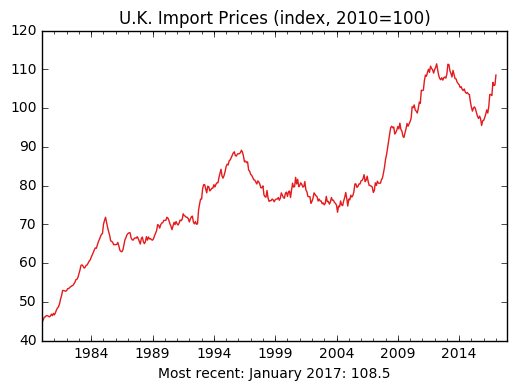

In [9]:
# Title and text with recent value
title = 'U.K. Import Prices (index, {}=100)'.format(baseyr)
recentdate = df.dropna().index[-1].strftime('%B %Y')
recentval = df.dropna()[-1]
recent = 'Most recent: {}: {}'.format(recentdate, recentval)

# Basic plot 
ax = df.plot(title=title, colormap='Set1')
ax.set_xlabel(recent)

In [5]:
fig = ax.get_figure()
fig.savefig('data/UK_MP.png')

### Variations: breaking down the request

The IMF's API url, combined with a method, series, frequency, area, and indicator specific key, provides a JSON structured dataset. These last five components, which are variable, combine to serve as the key to the request in the short example above, and are explained in more detail as follows:

* Method: CompactData retrieves data, DataStructure retrieves metadata;
* Series: The broad group of indicators, in this case International Financial Statistics 'IFS';
* Frequency: For example monthly 'M', quarterly 'Q', or annually 'A';
* Area: The country, region, or set of countries, for example 'GB' for the U.K., or 'GB+US' for the U.K. and the U.S.;
* Indicator: The code for the indicator of interest--IFS includes more that 2500; and
* Date Range (Optional): Use this to limit the data range returned, for example '?startPeriod=2010&endPeriod=2017' otherwise the full set of data is returned.

These components are combined as: {Method}/{Series}/{Frequency}.{Area}.{Indicator}.{Date Range}, for example CompactData/IFS/M.GB.PMP_IX.?startPeriod=2010&endPeriod=2017